In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import fastNlMeansDenoising
import pywt
from skimage.io import imread
from skimage.util import img_as_float32
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from src.noiseDist import addNoise
from src.thresholdingMethod import applyShrink
from src.utilities import get_sigma_est, mse, gaussianSmoothing, medianSmoothing

In [20]:
img = imread('dataset\cameraman.tif')
img_float = img_as_float32(img)
img.shape

(512, 512)

In [44]:
# mode = gaussian      sigma = Low: 15             Moderate:  25             High: 50
# mode = s&p          amount = Low: 0.05           Moderate: 0.1             High: 0.2
# mode = uniform   low, high = Low: (-0.1, 0.1)    Moderate: (-0.2, 0.2)     High: (-0.5, 0.5)

noisy_img = addNoise(img_float, mode = 'gaussian', mean = 0, sigma = 25, amount = 0.05, low = -0.2, high = 0.2)
noisy_img.shape

(512, 512)

Text(0.5, 1.0, 'Noisy Image')

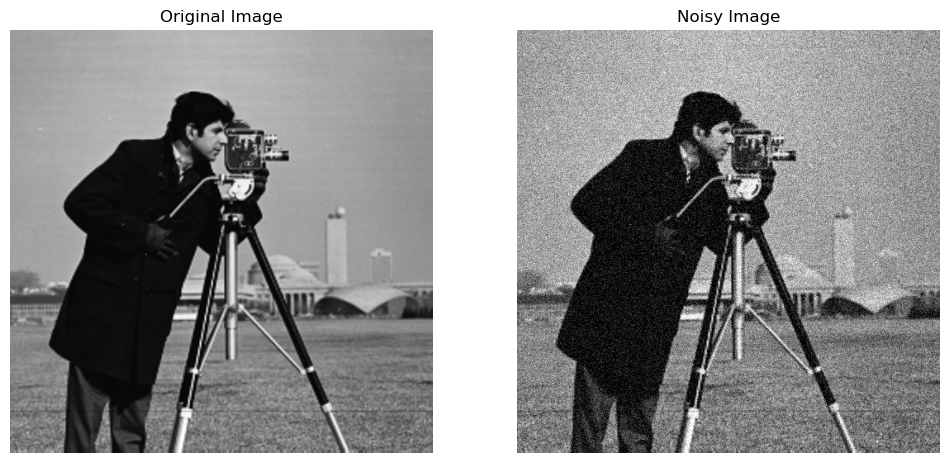

In [45]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(noisy_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Noisy Image")

In [46]:
coeffs = pywt.wavedec2(noisy_img, wavelet='db4', level=4)

In [47]:
N = noisy_img.size

# 2. Estimate noise standard deviation *once*
sigma_est = get_sigma_est(coeffs)
sigma_est

np.float64(0.09024636202699814)

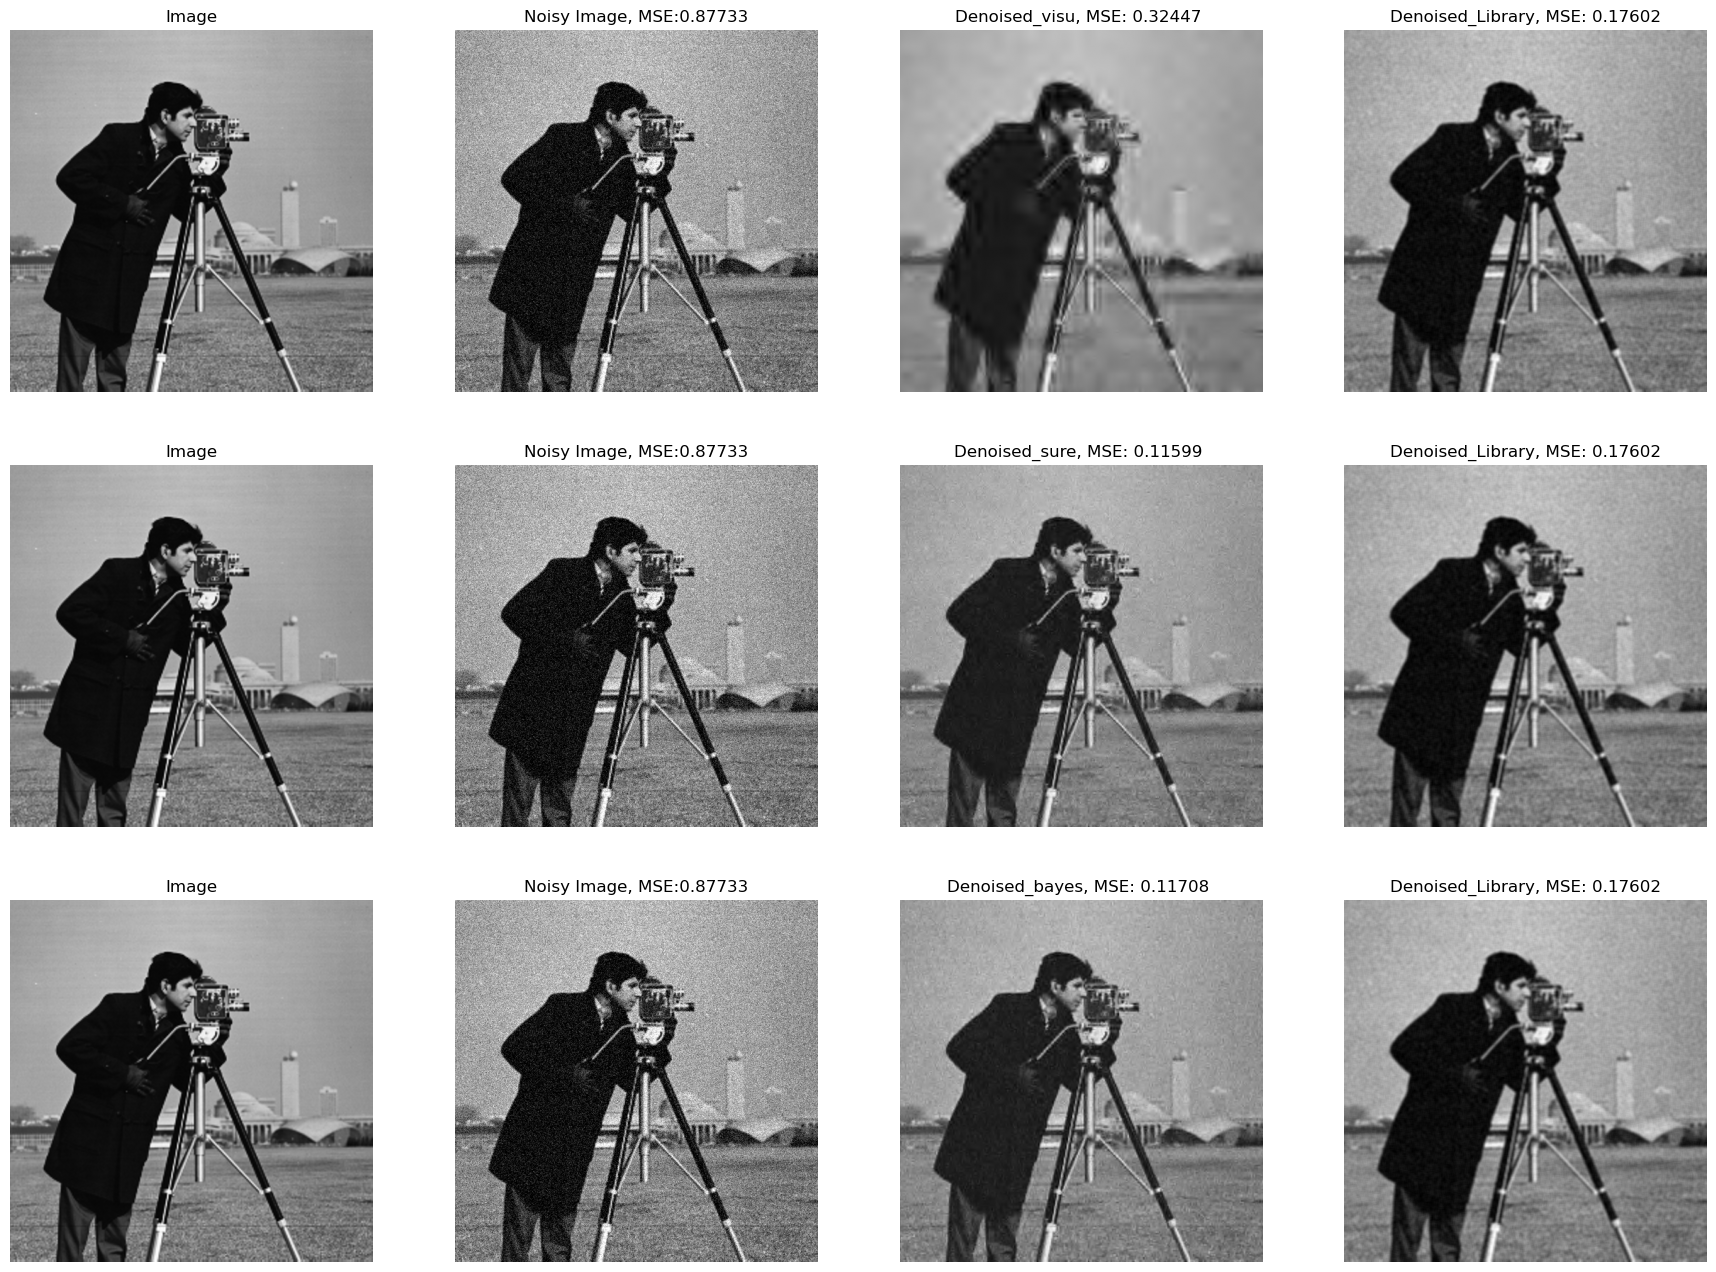

In [60]:
mode = ['visu', 'sure', 'bayes']
denoised_img_lib = gaussianSmoothing(noisy_img, 5, 15)
# denoised_img_lib = fastNlMeansDenoising((noisy_img * 255).astype(np.uint8), None, 25)
fig,axes = plt.subplots(nrows=len(mode), ncols=4, figsize=(22,16))

for i in range(len(mode)):
    thresholded_details = applyShrink(coeffs, sigma_est, N,  mode = mode[i])
    denoised_img = pywt.waverec2(thresholded_details, wavelet="db4")
    
    axes[i, 0].imshow(img_float, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title("Image")

    axes[i, 1].imshow(noisy_img, cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"""Noisy Image, MSE:{mse(img_float, noisy_img)*100:.5f}""")

    axes[i, 2].imshow(denoised_img, cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"""Denoised_{mode[i]}, MSE: {mse(img_float, denoised_img)*100:.5f} """)

    axes[i, 3].imshow(img_as_float32(denoised_img_lib), cmap='gray')
    axes[i, 3].axis('off')
    axes[i, 3].set_title(f"""Denoised_Library, MSE: {mse(img_float, img_as_float32(denoised_img_lib))*100:.5f}""")




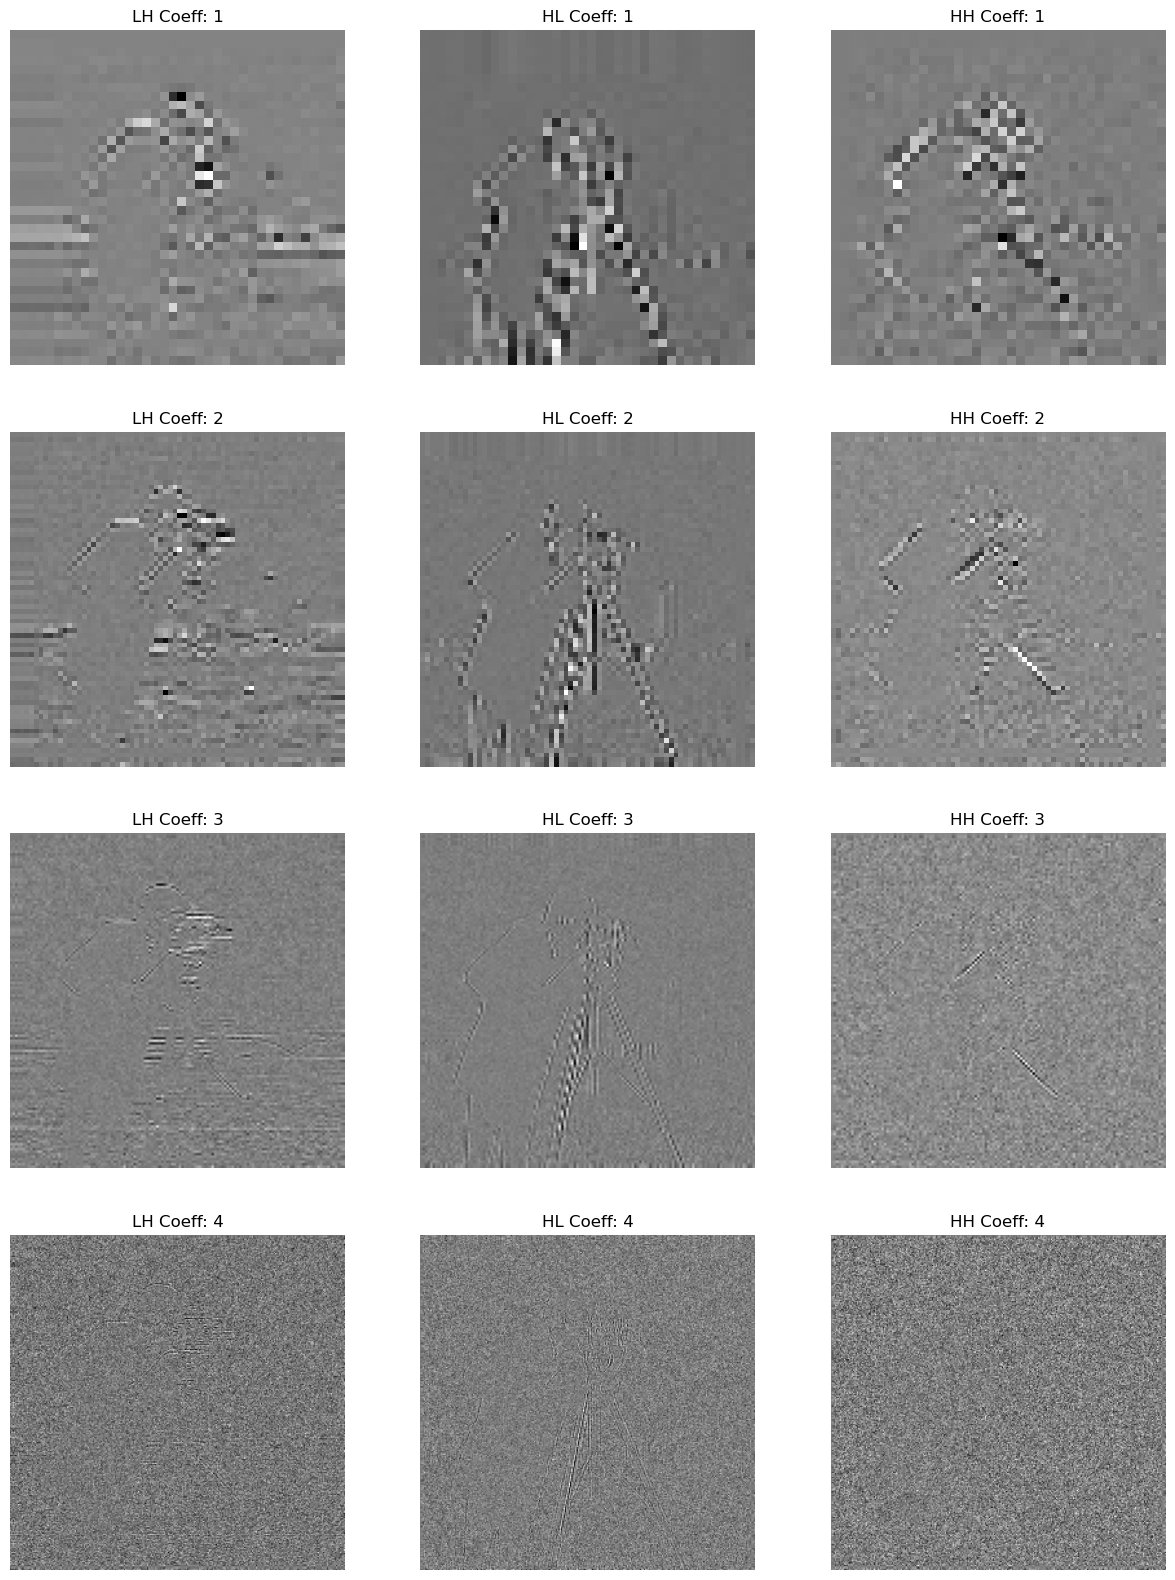

In [8]:
# Plotting Wavelet Coefficients
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
for i in range(1, 5):
    axes[i-1, 0].imshow(coeffs[i][0], cmap='gray')
    axes[i-1, 0].axis('off')
    axes[i-1, 0].set_title(f"""LH Coeff: {i}""")

    axes[i-1, 1].imshow(coeffs[i][1], cmap='gray')
    axes[i-1, 1].axis('off')
    axes[i-1, 1].set_title(f"""HL Coeff: {i}""")

    axes[i-1, 2].imshow(coeffs[i][2], cmap='gray')
    axes[i-1, 2].axis('off')
    axes[i-1, 2].set_title(f"""HH Coeff: {i}""")
